# **Problem Statement**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

- Output: Number of predicted wins (W)

In [2]:
#Importing the required library for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/baseball.csv") # loading mydataframe into df variable

In [4]:
df.head()               #view my first 5 records

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# **The Column names which shows above has no any meanings so converted all as below**

In [5]:
new_column_list = ["Wins","Runs","At Bats","Hits","Doubles","Triples","Homeruns","Walks","Strikeouts","Stolen Bases","Runs Allowed",'Earned Runs',"Earned Run Average (ERA)", 'Complete Games', 'Shutouts', 'Saves',
       'Errors']

In [6]:
df.set_axis(new_column_list,axis=1,inplace=True)   #replaced column name with new name from list

In [7]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'Saves',
       'Errors'],
      dtype='object')

In [8]:
df.describe()#statisical descripton for my dataframe here i see some columns has outliers which will be treated later on

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
df.info()#info of my dataframe which says if any null values along with datatype here all are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

# **EDA**

# **Checking for Null values present in my dataframe**

In [10]:
df.isnull()  #checking null values

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()    #count of my nullvalues

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

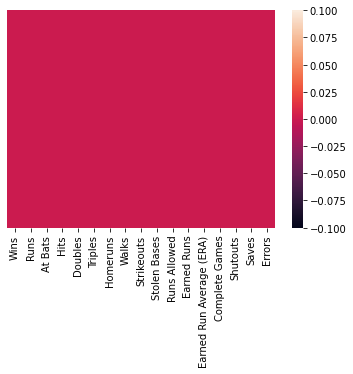

In [12]:
sns.heatmap(df.isnull(),yticklabels=False)    #visualising null values if any

I see no null values here and there are no classification features in my dataset so lets check for outliers by using distplot and boxplot as below for all my columns

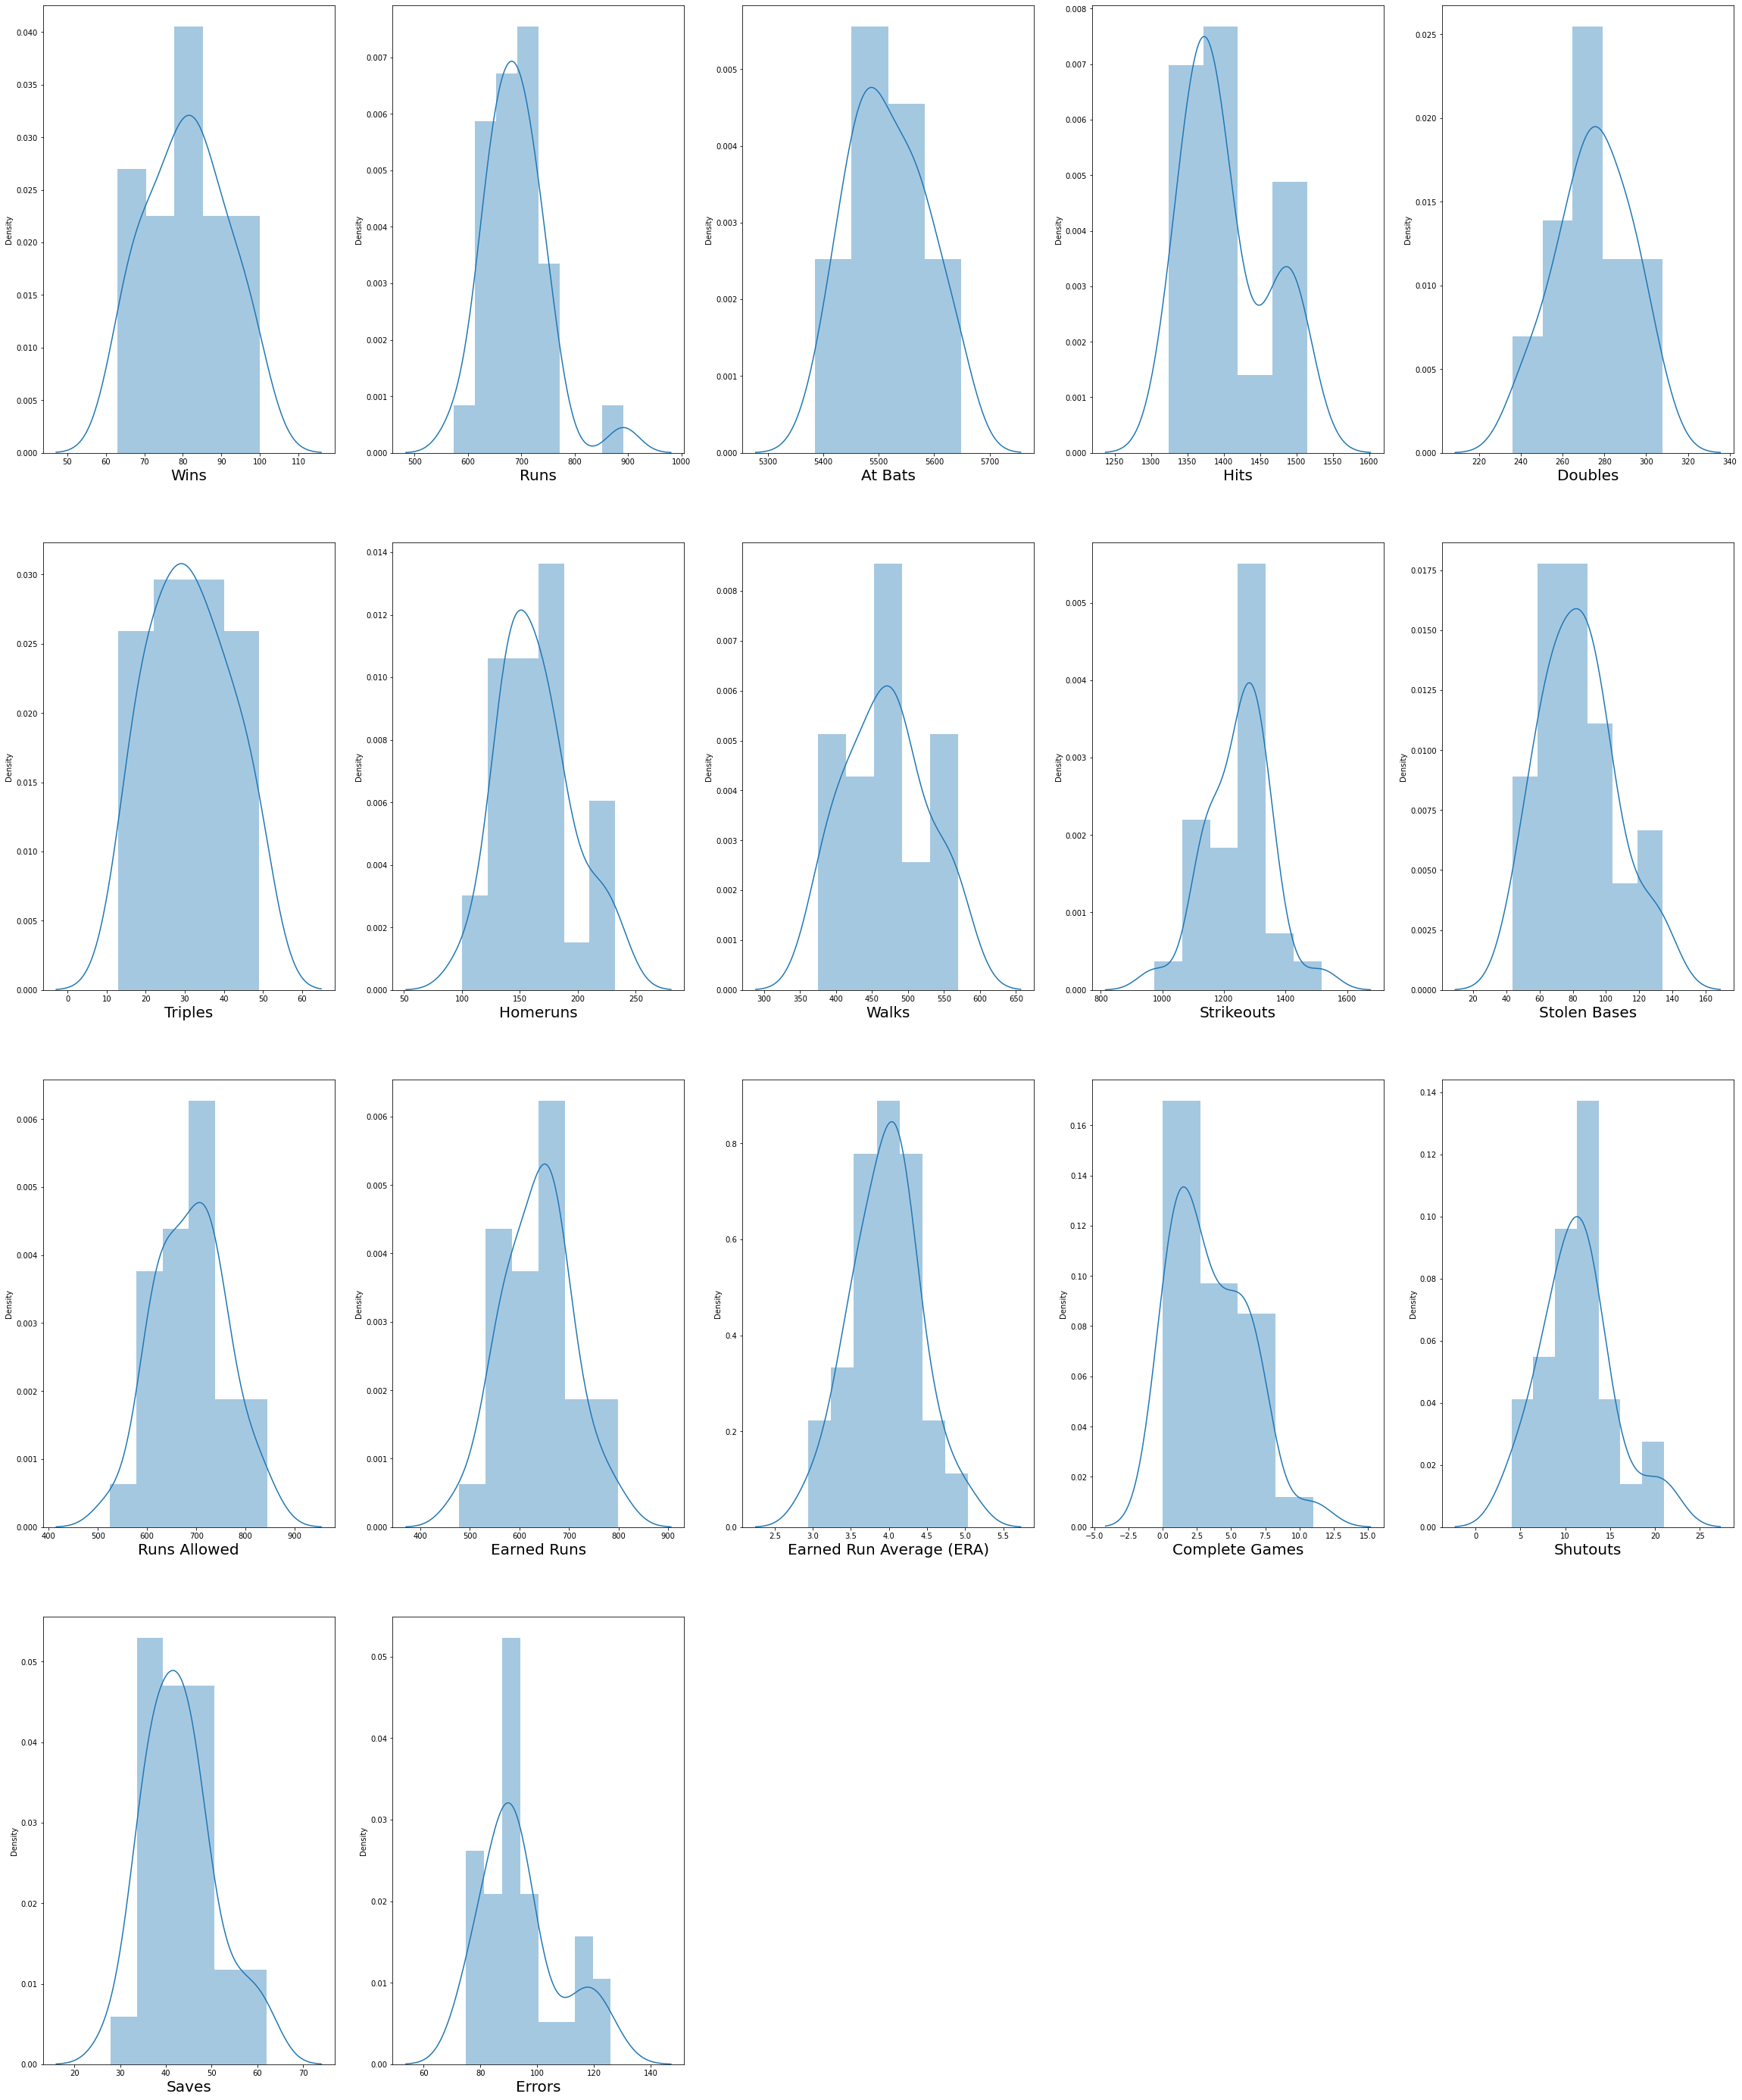

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(40,50),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
            ax = plt.subplot(4,5,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

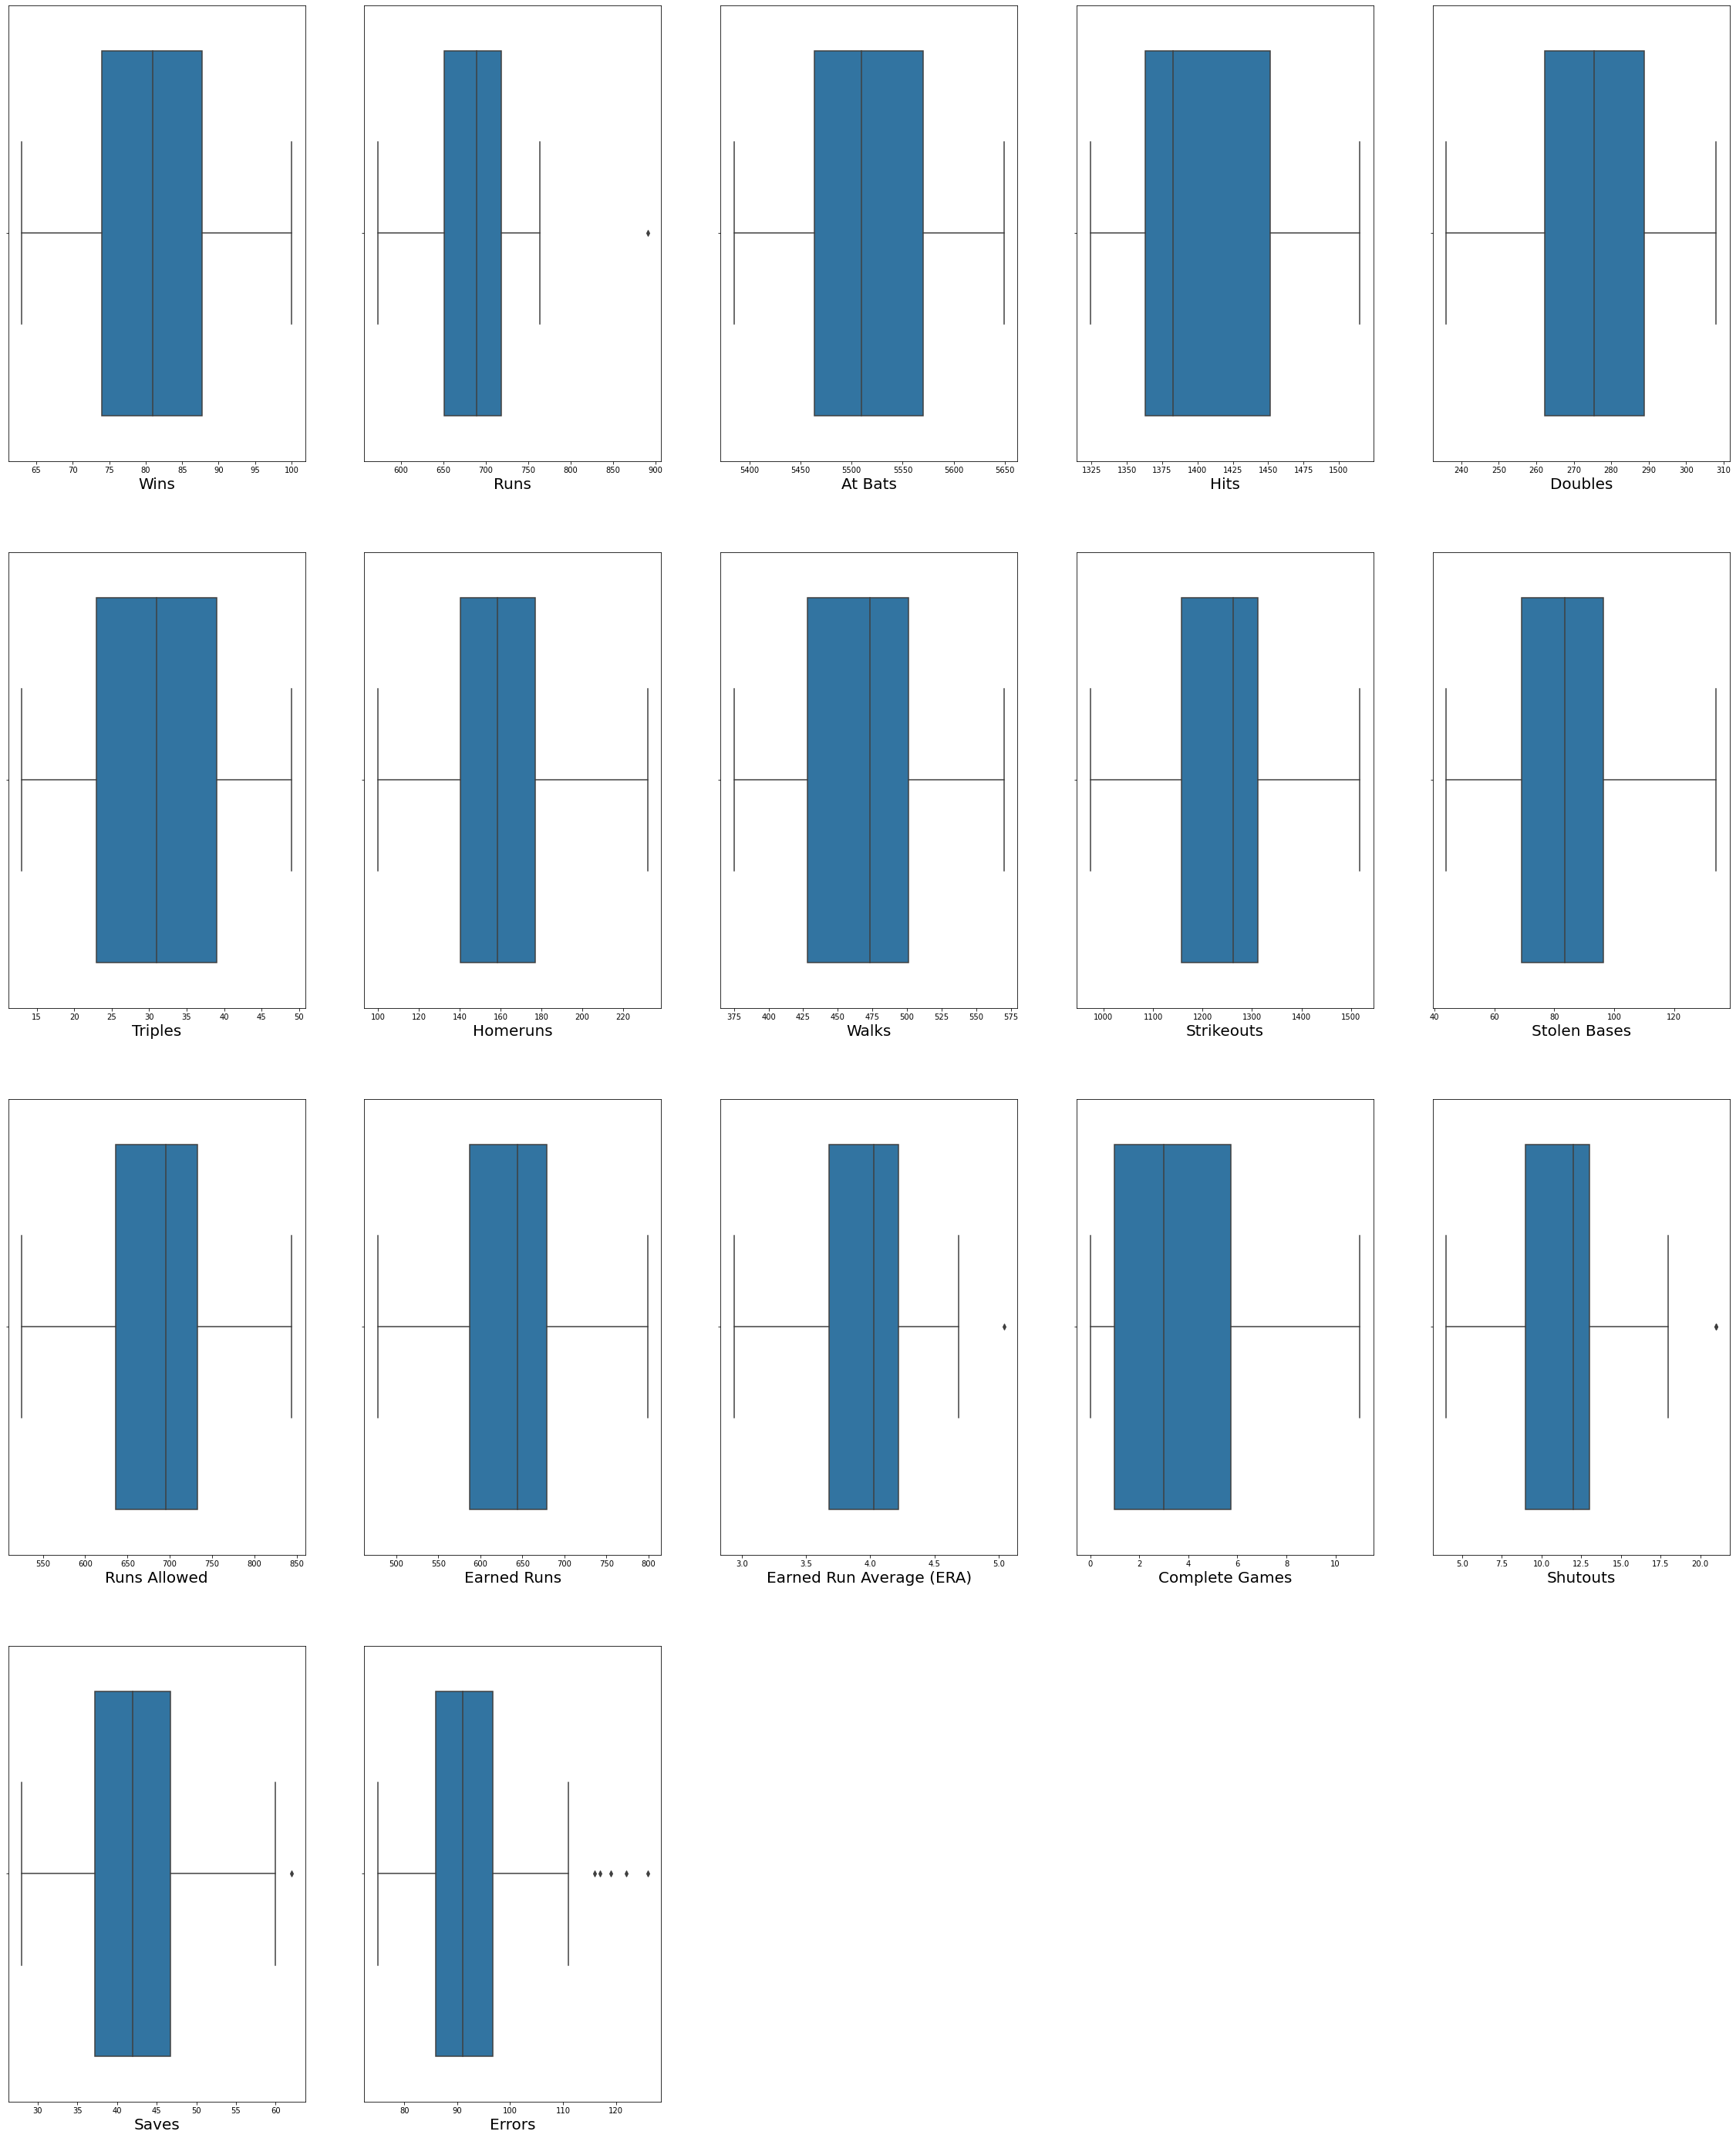

In [14]:
plt.figure(figsize=(40,50),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
            ax = plt.subplot(4,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [15]:
#checking for Z score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

print(z)

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.05110079e-01
  5.06955186e-01 5.39806195e-01 8.14628593e-01 1.67160651e+00
  4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 2.48929848e-01
  2.54597523e-01 5.39806195e-01 1.72800005e-01 2.49879323e-01
  6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 7.51623132e-01
  6.41346840e-01 2.77264091e+00 3.20914294e-01 6.54856158e-01
  1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.03922169e-01
  5.30100415e-02

In [16]:
index = (np.where(z>4)[0])

In [17]:
df = df.drop(df.index[index])

In [18]:
df.shape

(30, 17)

Basically my zscore did not remove any records based on the critiria given here. and i decided not to remove any record as we have less obeservation here.

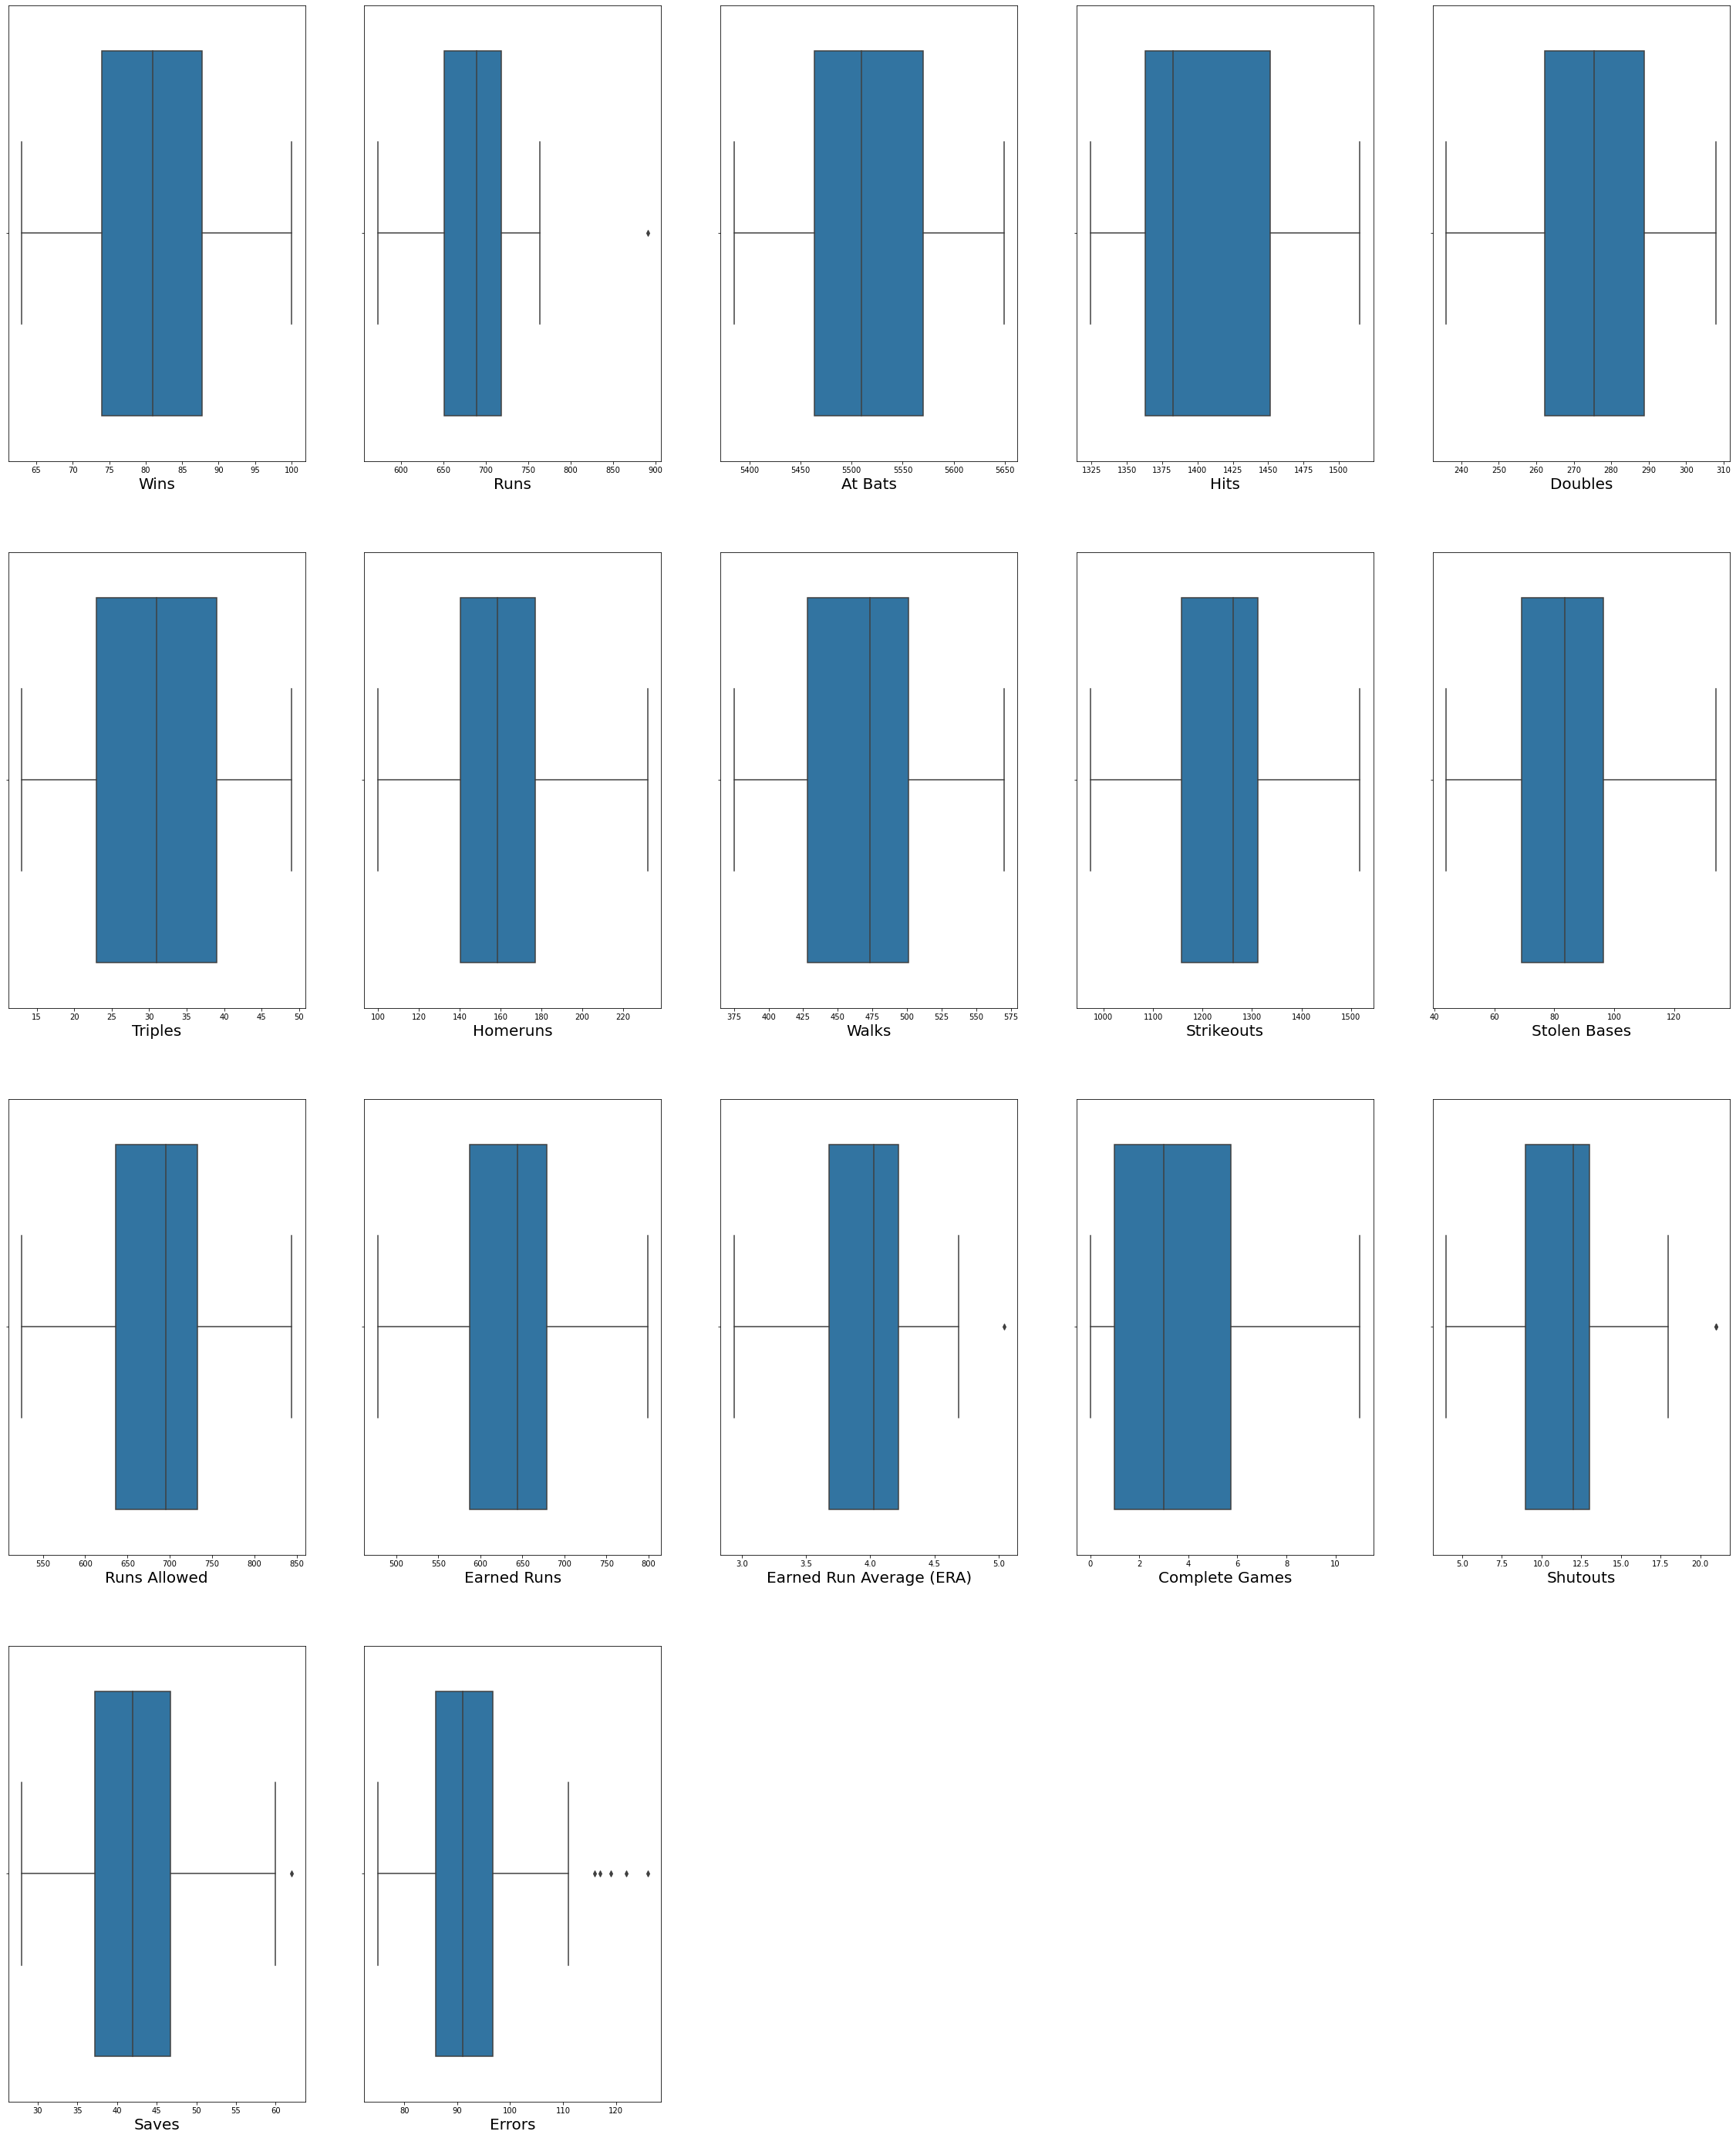

In [19]:
#plots post outlier removal
plt.figure(figsize=(40,50),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
            ax = plt.subplot(4,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [20]:
#checking correlation for between my features
corr_mat = df.corr()

<function matplotlib.pyplot.show>

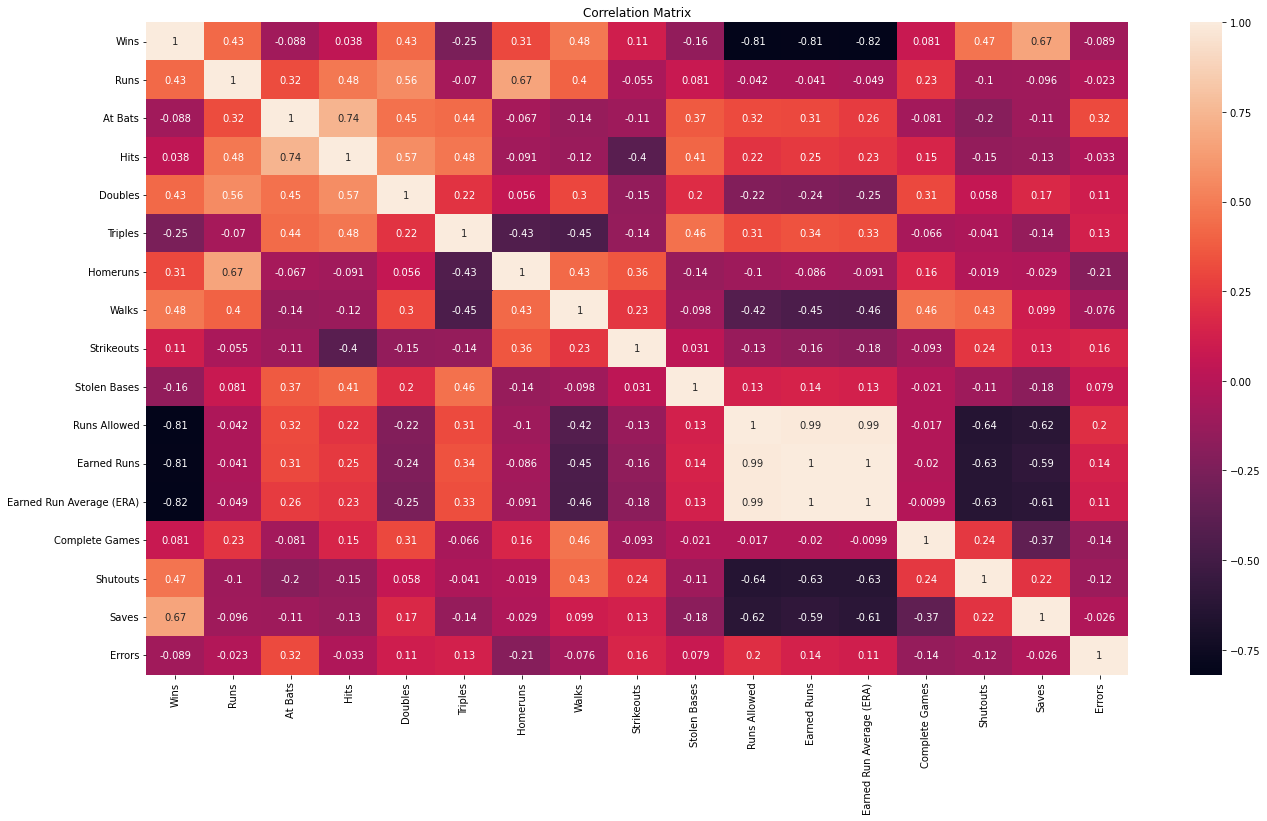

In [21]:
#Visualising heatmap for corr_mat. 
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

In [22]:
#Seprating my features and labels
X = df.drop(['Wins'], axis = 1)
y = df['Wins']

In [23]:
#Scaling my features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [24]:
#Splitting my train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33,random_state=253)

In [25]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train , y_train)
pred = lr.predict(X_test)

In [26]:
#metrics for my linear regression
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [27]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 6.349390851580684
The r2-score is: 0.4725959682609041


In [28]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred1 = DT.predict(X_test) #Predict  

In [29]:
#metrics for my decision tree
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_1 = r2_score(y_test, y_pred1)

In [30]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 10.173494974687902
The r2-score is: -0.3540031397174255


In [31]:
# using Random forest Regressor to my dataset
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor() #Instantiate the LogisticRegression object
rf.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred2 = rf.predict(X_test) #Predict  

In [32]:
#metrics for random forest
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

In [33]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 6.045840719039823
The r2-score is: 0.5218185504971223


In [34]:
# using adaboost  regressor to my dataset
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor() #Instantiate the LogisticRegression object
ab.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred3 = ab.predict(X_test) #Predict 

In [35]:
#metrics for my adaboost model
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3 = r2_score(y_test, y_pred3)

In [36]:
#printing my scores
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 5.682820113679865
The r2-score is: 0.5775190418047562


In [37]:
# using bagging  regressor to my dataset
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor() #Instantiate the LogisticRegression object
bg.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred4 = bg.predict(X_test) #Predict  

In [38]:
#metrics for my bagging model
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
r2_4  = r2_score(y_test, y_pred4)

In [39]:
#score for my metrics to be printed
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 6.311497445139309
The r2-score is: 0.4788723181580322


This dataset changes r2 score and rmse score for my each run and i have decided not to use any hyperparameter tuning for the same as it will change my current accuracy which is in best currently and the same has been saved in pkl file

In [40]:
#Saving the model in pkl file
import joblib
joblib.dump(ab,"Baseball_Prediction.pkl")

model = joblib.load("Baseball_Prediction.pkl")

#Predicting the saved model
prediction = model.predict(X_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("Results_Baseball.csv",index=False)